In [3]:
# importing dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
#read csv
train_df = pd.read_csv("salary_prediction_ML.csv")
test_df = pd.read_csv("salary_prediction_ML_test.csv")

In [ ]:
train_df

In [ ]:
#separate columns
categorical_columns = ['sex', 'marital', 'workclass', 'education', 'location','race','occupation']
numerical_columns = ['age', 'workhour']


In [ ]:
fig,axes = plt.subplots(4,2,figsize=(15,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='above/below50K',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [2]:
##get to know numerical data
print(train_df[numerical_columns].describe())

NameError: name 'train_df' is not defined

In [ ]:
#prepare the data for machine learning by encoding the data
train_df_encoded = pd.get_dummies(train_df)


In [ ]:
train_df_encoded

In [3]:
# Gender_Male: male = 1, female = 0
# Married_Yes: yes = 1, no = 0
# Education_Graduate: grad = 1, not grad = 0
# Self_Employed_Yes: yes = 1, no = 0
# Loan_Status_Y: yes = 1, no = 0 
train_df_encoded = train_df_encoded.drop(columns=['sex_ Female', 'above/below50K_ <=50K'])
train_df_encoded.head()


NameError: name 'train_df_encoded' is not defined

In [4]:
#Split Features and Target Varible
X = train_df_encoded.drop(columns='above/below50K_ >50K')
y = train_df_encoded['above/below50K_ >50K']

#Splitting into Train-Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

NameError: name 'train_df_encoded' is not defined

In [5]:
##Model 1: Decision Tree Classifier

model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(model1,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(model1,X_train,y_train,cv=5,scoring='accuracy').mean())

NameError: name 'DecisionTreeClassifier' is not defined

In [6]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []

for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)

NameError: name 'DecisionTreeClassifier' is not defined

In [7]:
#show the accuracy and validation
Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

NameError: name 'plt' is not defined

In [44]:
#train the the data before the accuracy drops
model1 = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
confusion_matrix(y_test,y_pred)
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

#true negative:64, false positive is high:14, people shouldnt get approved will be approved

Test Accuracy:  0.8083872037129123
Test F1 Score:  0.5167224080267558
Confusion Matrix on Test Data


array([[4259,  272],
       [ 884,  618]], dtype=int64)

In [45]:
#Model 2: Random Forest Classifier

model2 = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(model2,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(model2,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.2638285954348131
Train Accuracy  0.7821293878735132
Validation Mean F1 Score:  0.5738516442366817
Validation Mean Accuracy:  0.7803058562321106


In [46]:
y_predict = model2.predict(X_test)
print("Test F1 Score: ",f1_score(y_test,y_predict))
print("Test Accuracy: ",accuracy_score(y_test,y_predict))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Test F1 Score:  0.2826933778519755
Test Accuracy:  0.7863417868390519
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,4490,41,4531
1,1248,254,1502
All,5738,295,6033


In [ ]:
#Model 3: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [47]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    model3= LogisticRegression(solver='liblinear')
    model3.fit(X_train,y_train)
    
    y_pred_train_thresh = model3.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = model3.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

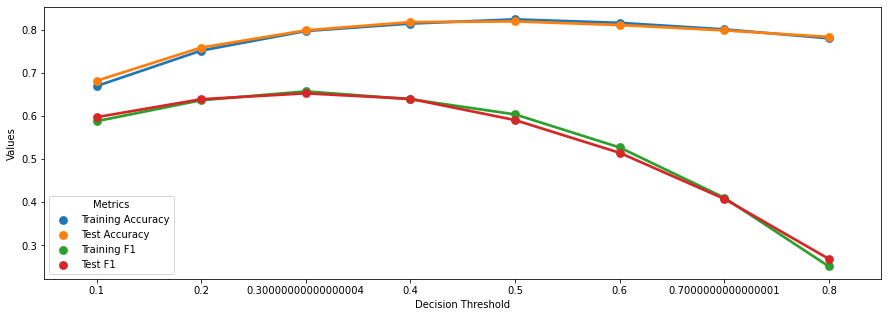

In [48]:
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [49]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = model3.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8176694845019061
Test F1 Score:  0.6398166339227243
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,3956,575,4531
1,525,977,1502
All,4481,1552,6033


In [50]:
#Create the GridReseach
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [51]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ................................C=1, penalty=l1; total time=   1.8s
[CV 2/5] END ................................C=1, penalty=l1; total time=   1.3s
[CV 3/5] END ................................C=1, penalty=l1; total time=   2.0s
[CV 4/5] END ................................C=1, penalty=l1; total time=   1.0s
[CV 5/5] END ................................C=1, penalty=l1; total time=   1.1s
[CV 1/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 2/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 3/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 4/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 5/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 1/5] END ................................C=5, penalty=l1; total time=   0.2s
[CV 2/5] END ................................C=5,

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [52]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l1'}
0.823780609779927


In [53]:
model3 = LogisticRegression(solver='liblinear',C= 1, penalty='l1',max_iter=1000)

In [56]:
model3.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')

In [58]:
y_training_pred = model3.predict(X_train)
y_testing_pred = model3.predict(X_test)

In [59]:
print("Test Accuracy: ",accuracy_score(y_test,y_testing_pred))
print("Test F1 Score: ",f1_score(y_test,y_testing_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_testing_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8186640145864412
Test F1 Score:  0.5893393393393394
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,4154,377,4531
1,717,785,1502
All,4871,1162,6033


In [1]:
import pickle
pickle.dump(model3, open("model.pkl","wb"))

NameError: name 'model3' is not defined

In [62]:
# import joblib
# filename = 'logistic.joblib'
# joblib.dump(model3, filename)

NameError: name 'ada_clf' is not defined

NameError: name 'raw_train_data' is not defined

In [7]:
# states_df.to_csv("salary_prediction.csv")